In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
!pip install soundata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 17.9 MB/s eta 0:00:00
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64900 sha256=f1f3ef84763beda39d2b79df488f661478bae793ceefe98eb94fcf068edc3c62
  Stored in directory: /root/.cache/pip/wheels/3e/b9/4f/64010f7e4412ba5c6190fe04ce93487970f

In [5]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there


5.61GB [12:11, 8.24MB/s]                                
1.15MB [00:01, 727kB/s]                             
100%|██████████| 8732/8732 [00:21<00:00, 415.14it/s]


({'metadata': {}, 'clips': {}}, {'metadata': {}, 'clips': {}})

In [6]:
example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip.fold)  # see the available data
print(example_clip)  # see the available data

4
Clip(
  audio_path="/root/sound_datasets/urbansound8k/audio/fold4/195969-0-0-18.wav",
  clip_id="195969-0-0-18",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_tim

In [7]:
main_data = list(dataset.load_clips().values())

In [8]:
for i, x in enumerate(main_data):
    if i > 10:
        break
    print(x.fold, x.class_label, x.class_id, x.audio_path)

1 children_playing 2 /root/sound_datasets/urbansound8k/audio/fold1/135776-2-0-49.wav
1 gun_shot 6 /root/sound_datasets/urbansound8k/audio/fold1/46654-6-0-0.wav
1 air_conditioner 0 /root/sound_datasets/urbansound8k/audio/fold1/57320-0-0-24.wav
1 air_conditioner 0 /root/sound_datasets/urbansound8k/audio/fold1/134717-0-0-26.wav
1 jackhammer 7 /root/sound_datasets/urbansound8k/audio/fold1/174276-7-5-0.wav
1 jackhammer 7 /root/sound_datasets/urbansound8k/audio/fold1/180937-7-2-6.wav
1 drilling 4 /root/sound_datasets/urbansound8k/audio/fold1/17913-4-0-1.wav
1 jackhammer 7 /root/sound_datasets/urbansound8k/audio/fold1/103074-7-4-6.wav
1 engine_idling 5 /root/sound_datasets/urbansound8k/audio/fold1/176787-5-0-9.wav
1 drilling 4 /root/sound_datasets/urbansound8k/audio/fold1/55020-4-0-11.wav
1 dog_bark 3 /root/sound_datasets/urbansound8k/audio/fold1/138015-3-0-7.wav


In [12]:
tmp_df = []

for clip in main_data:
    if clip.fold == 10 or clip.fold == 9:
        continue
    if clip.class_label == 'air_conditioner':
        tmp_df.append(("air_conditioner", clip.audio_path))
    elif clip.class_label == 'car_horn':
        tmp_df.append(("car_horn", clip.audio_path))
    elif clip.class_label == 'children_playing':
        tmp_df.append(("children_playing", clip.audio_path))
    elif clip.class_label == 'dog_bark':
        tmp_df.append(("dog_bark", clip.audio_path))
    elif clip.class_label == 'drilling':
        tmp_df.append(("drilling", clip.audio_path))
    elif clip.class_label == 'engine_idling':
        tmp_df.append(("engine_idling", clip.audio_path))
    elif clip.class_label == 'gun_shot':
        tmp_df.append(("gun_shot", clip.audio_path))
    elif clip.class_label == 'jackhammer':
        tmp_df.append(("jackhammer", clip.audio_path))
    elif clip.class_label == 'siren':
        tmp_df.append(("siren", clip.audio_path))
    elif clip.class_label == 'street_music':
        tmp_df.append(("street_music", clip.audio_path))

df = pd.DataFrame.from_dict(tmp_df)
df.rename(columns={1 : "Path", 0 : "Class"}, inplace=True)

df.head()

,Class,Path
0,children_playing,/root/sound_datasets/urbansound8k/audio/fold1/...
1,gun_shot,/root/sound_datasets/urbansound8k/audio/fold1/...
2,air_conditioner,/root/sound_datasets/urbansound8k/audio/fold1/...
3,air_conditioner,/root/sound_datasets/urbansound8k/audio/fold1/...
4,jackhammer,/root/sound_datasets/urbansound8k/audio/fold1/...


In [15]:
%matplotlib inline

plt.style.use("ggplot")     

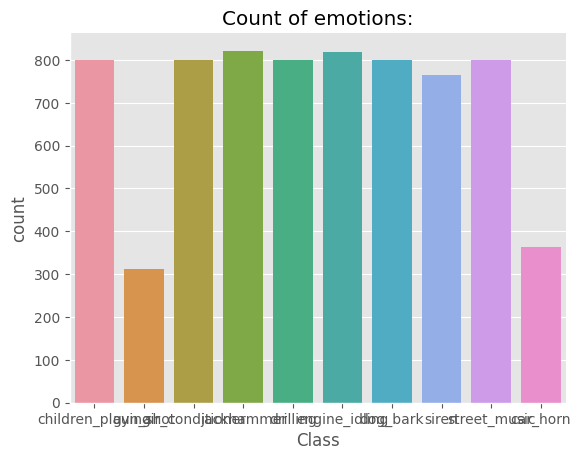

In [19]:
plt.title("Count of emotions:")
sns.countplot(x=df["Class"])
sns.despine(top=True, right=True, left=False, bottom=False)

# Resources

1. https://urbansounddataset.weebly.com/urbansound8k.html